In [6]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [7]:
df = np.loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')

In [8]:
df

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [9]:
df.shape

(768, 9)

In [10]:
x = df[:,:8]
y = df[:,8]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
print(f"x train shape{X_train.shape}")
print(f"y train shape{y_train.shape}")
print(f"x test shape{X_test.shape}")
print(f"y test shape{y_test.shape}")
print(f"x val shape{X_val.shape}")
print(f"y val shape{y_val.shape}")

x train shape(614, 8)
y train shape(614,)
x test shape(77, 8)
y test shape(77,)
x val shape(77, 8)
y val shape(77,)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [14]:
from collections import Counter
Counter(y)

Counter({0.0: 500, 1.0: 268})

In [15]:
import seaborn as sns

In [13]:
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential([

tf.keras.layers.InputLayer(8,),
Dense(50,activation='relu'),
    
Dense(50,activation='relu'),
Dense(50,activation='relu'),
Dense(50,activation='relu'),
    
Dense(1,activation='sigmoid')
])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8151 (31.84 KB)
Trainable params: 8151 (31.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [30]:
history = model.fit(x=x,y=y,epochs=25, batch_size=500,validation_data=(X_val,y_val))

Epoch 1/25
2/2 [==============================] - 0s 123ms/step - loss: 0.4009 - accuracy: 0.8164 - val_loss: 0.7909 - val_accuracy: 0.6104
Epoch 2/25
2/2 [==============================] - 0s 66ms/step - loss: 0.4012 - accuracy: 0.8151 - val_loss: 0.7909 - val_accuracy: 0.6104
Epoch 3/25
2/2 [==============================] - 0s 69ms/step - loss: 0.4016 - accuracy: 0.8112 - val_loss: 0.7910 - val_accuracy: 0.6104
Epoch 4/25
2/2 [==============================] - 0s 62ms/step - loss: 0.4006 - accuracy: 0.8138 - val_loss: 0.7913 - val_accuracy: 0.6104
Epoch 5/25
2/2 [==============================] - 0s 67ms/step - loss: 0.4001 - accuracy: 0.8190 - val_loss: 0.7916 - val_accuracy: 0.6104
Epoch 6/25
2/2 [==============================] - 0s 55ms/step - loss: 0.4001 - accuracy: 0.8190 - val_loss: 0.7919 - val_accuracy: 0.6104
Epoch 7/25
2/2 [==============================] - 0s 64ms/step - loss: 0.4001 - accuracy: 0.8190 - val_loss: 0.7920 - val_accuracy: 0.6104
Epoch 8/25
2/2 [==========

<AxesSubplot: >

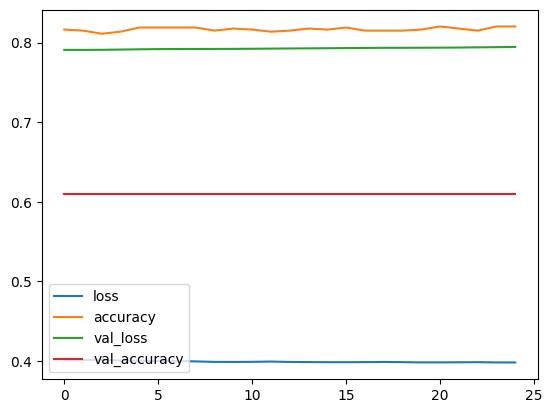

In [31]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [32]:
model.evaluate(x,y)

24/24 [==============================] - 0s 7ms/step - loss: 0.3981 - accuracy: 0.8190


[0.3981264531612396, 0.8190104365348816]

In [33]:
y_pred = model.predict(X_test)
y_pred

3/3 [==============================] - 0s 6ms/step


array([[0.19067593],
       [0.19199562],
       [0.12028762],
       [0.12056991],
       [0.08439234],
       [0.17099527],
       [0.12366695],
       [0.20651293],
       [0.20941985],
       [0.15472724],
       [0.13664874],
       [0.21422127],
       [0.15540652],
       [0.17577767],
       [0.18489483],
       [0.20770562],
       [0.18772168],
       [0.22056726],
       [0.21485648],
       [0.21828829],
       [0.12115736],
       [0.1883155 ],
       [0.24208197],
       [0.14715748],
       [0.15659195],
       [0.12092391],
       [0.20264044],
       [0.1654087 ],
       [0.16633132],
       [0.18862365],
       [0.21634044],
       [0.18640423],
       [0.2316734 ],
       [0.17272425],
       [0.18025881],
       [0.2274827 ],
       [0.25268403],
       [0.16944598],
       [0.14875412],
       [0.13752207],
       [0.1651227 ],
       [0.14246757],
       [0.20300068],
       [0.16977538],
       [0.1331932 ],
       [0.20911501],
       [0.18446396],
       [0.071